In [25]:
import numpy as np
from Req import Hamiltonian, held_karp, gen_ran, gen_poly
from ant_colony.ant_colony import ant_colony
from time import time
from Req.req import Map
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

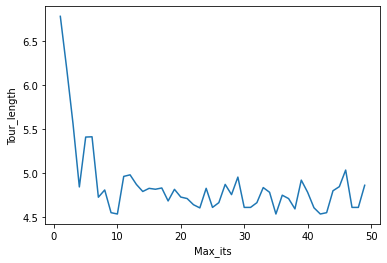

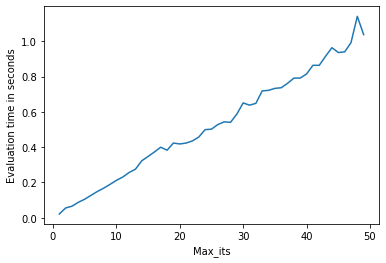

In [13]:
map = gen_ran(30)
#print(held_karp(map).cost())
times = []
tour_length = []
for i in range(1, 50):
    t0 = time()
    sol = ant_colony(map, 2.5, 2.5, 20, 0.01, 1, i)
    t1 = time()
    times.append(t1 - t0)
    tour_length.append(sol.cost())

plt.plot([i for i in range(1, 50)], tour_length)
plt.xlabel("Max_its")
plt.ylabel("Tour_length")
plt.show()
plt.plot([i for i in range(1, 50)], times)
plt.xlabel("Max_its")
plt.ylabel("Evaluation time in seconds")
plt.show()



(1, 15.659071046575209)(2, 14.282960569838831)(3, 14.024815172132119)(4, 12.439055920118218)(5, 12.439055920118218)(6, 12.370081977307487)(7, 12.123345603934053)(8, 11.348139594314912)(9, 10.935192040026223)(10, 10.935192040026223)(11, 10.89860569445569)(12, 9.952753971070631)(13, 9.584682657446855)(14, 9.584682657446855)(15, 9.531762987356178)(16, 9.531762987356178)(17, 9.531762987356178)(18, 9.008112021111328)(19, 9.008112021111328)(20, 9.008112021111328)(21, 9.008112021111328)(22, 9.008112021111328)(23, 9.008112021111328)(24, 8.757564940359032)(25, 8.757564940359032)(26, 8.757564940359032)(27, 8.757564940359032)(28, 8.757564940359032)(29, 8.757564940359032)(30, 8.757564940359032)(31, 8.757564940359032)(32, 8.757564940359032)(33, 8.757564940359032)(34, 8.757564940359032)(35, 8.757564940359032)(36, 8.757564940359032)(37, 8.757564940359032)(38, 8.757564940359032)(39, 8.757564940359032)(40, 8.757564940359032)(41, 8.757564940359032)(42, 8.757564940359032)(43, 8.757564940359032)(44, 8.757

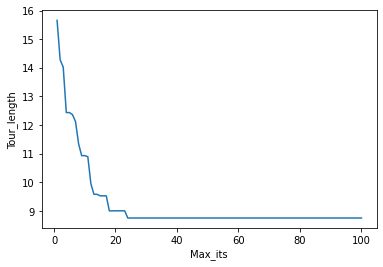

In [17]:
map = gen_ran(100)
sol = ant_colony(map, 2.5, 2.5, 20, 0.01, 1, 100, True)
ham = sol[0]
tour_lengths = sol[1]
lis = [str((a, b)) for a, b in zip([i for i in range(1, 101)], tour_lengths)]
print(''.join(lis))
plt.plot([i for i in range(1, 101)], tour_lengths)
plt.xlabel("Max_its")
plt.ylabel("Tour_length")
plt.show()

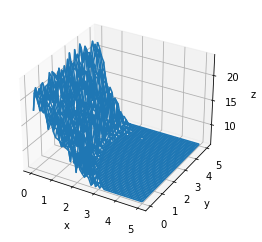

In [36]:
map = gen_poly(20)

alpha = np.linspace(0,5)
beta = np.linspace(0,5)
A, B = np.meshgrid(alpha, beta)

def f(a, b):
    return ant_colony(map, a, b, 5, 0.2, 1, 10).cost()


T = np.array([[f(a, b) for b in beta] for a in alpha])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(A, B, T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

T = np.array([[f(a, b) for b in beta] for a in alpha])